# Grade: /20 Mark(s)

# Lab Assignment 02: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can use the maximum likelihood principle to develop a regression model relating $x$ to $y$.




### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [1]:
#It's dangerous to go alone.  Take these!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.tools import add_constant
from scipy.optimize import minimize
from scipy.special import gammaln
import pytest



In [2]:
from scipy.stats import poisson
    
class TestPublicTests:

    """
    You can verify your code is working by running these tests.
    """

    def test_poissonNegLogLikelihood_returns_float(self):
        # Your function should return a float, not an array
        assert isinstance(poissonNegLogLikelihood(1.0, 1.0), float)

    def test_poissonNegLogLikelihood_returns_nan(self):
        # Your function should return NAN when I pass lam=0, y=0
        assert np.isnan(poissonNegLogLikelihood(0, 0))

    def test_poissonNegLogLikelihood_returns_inf(self):
        # Your function should return inf when I pass lam=0, y=1
        assert np.isinf(poissonNegLogLikelihood(0, 1))

    def test_poissonNegLogLikelihood_values(self):
        # Here are some test cases for your function.
        # If you pass all of these, that is good evidence that your function is working.
        pll_test_1 = poissonNegLogLikelihood(2.0, np.array([1.0]))
        # Test 1
        assert np.isclose(pll_test_1, 1.30, rtol=1e-2)

    def test_poissonNegLogLikelihood_values2(self):
        pll_test_2 = poissonNegLogLikelihood(5.5, 0)
        print(pll_test_2)
        # Test 2
        assert pll_test_2 == 5.5

    def test_poissonNegLogLikelihood_values3(self):
        pll_test_3 = poissonNegLogLikelihood(np.arange(1, 4), np.arange(1, 4))
        # Test 3
        assert np.isclose(pll_test_3, 3.8, rtol=1e-2)

    def test_poissonNegLogLikelihood_values4(self):

        pll_test_4 = poissonNegLogLikelihood(np.ones(2), np.ones(2))
        # Test 4
        assert np.isclose(pll_test_4, 2.0, rtol=1e-2)

    def test_poissonNegLogLikelihood_values5(self):
        # Test 5
        with pytest.raises(ValueError):
            # Should not compute when lam and y are different sizes
            poissonNegLogLikelihood(np.ones(2), np.ones(3))

    def test_poissonRegressionLogLikelihood(self):

        # Your answer should be a float
        n,p = 10,1
        x = np.random.normal(size=(n,p))
        x[:,0] = 1
        y = poisson.rvs(mu=2.0)
        b = np.zeros(p)
        prll_test_1 = poissonRegressionNegLogLikelihood(b, x, y)

        # Test 1
        assert isinstance(prll_test_1, float)

    def test_fitPoissonRegression(self):
        # This data has no relationship between x and y
        n, p = 20, 3
        X = np.random.normal(size=(n, p))
        X[:,0] = 1
        y = poisson.rvs(mu=2.0, size=n)
        betas = fitModel(X, y)

        # Test 1
        assert isinstance(betas, np.ndarray)

### Question 1: /2 Mark(s)

The negative log likelihood for a Poisson random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg( y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y_i!)$ does not affect the location of the maximum, and so you can omit the $ \ln(y_i!)$ in your function.


Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

What happens when you call the function when `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`? 

Answer the following below in markdown: What happens when you set an element of lam to 0 or a negative number and why? 


In [3]:
def poissonNegLogLikelihood(lam,y):
    
    # Read up on the gamma function to make sure you get the likelihood right!
    neg_log_lik = -np.sum((y*np.log(lam))-lam-gammaln(y+1))
    return neg_log_lik

lam = 1.3
y = np.array([2,1,0,0])

#lam=np.array([1,0.5,1,3])
#y=np.array([2,1,0,0])

#instead of keeping a constant, ex. 1.3, it sums the values in the array together, therefore it results in a larger number
#but arrays have to be the same size

final_answer = poissonNegLogLikelihood(lam,y)

print(final_answer)

#print(poissonNegLogLikelihood(0,0))

#test = TestPublicTests()
#test.test_poissonNegLogLikelihood_returns_float()
#test.test_poissonNegLogLikelihood_returns_nan()
#test.test_poissonNegLogLikelihood_returns_inf()
#test.test_poissonNegLogLikelihood_values()
#test.test_poissonNegLogLikelihood_values2()
#test.test_poissonNegLogLikelihood_values3()
#test.test_poissonNegLogLikelihood_values4()
#test.test_poissonNegLogLikelihood_values5()

5.106054387157472


Write your answer here

When you set an element of lam to 0 or a negative number it returns "nan", because log can only accept  a value from 1 to infinity.

### Question 2: /3 Mark(s)

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [4]:
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(np.dot(X,b))
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam,y)
    return neg_log_lik

b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])

final_answer = poissonRegressionNegLogLikelihood(b,X,y)

print (final_answer)

#test.test_poissonRegressionLogLikelihood()

3227.581865000517


### Question 3: /2 Mark(s)

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---
a) We applied the exponential function because using exp() will never result in a negative lam. Which allows us to calculate the proper negative log likelihood for a Poisson random variable every time, by ensuring we are only passing poissonRegressionNegLogLikelihood function positive values. 

b) If we had just passed $\lambda = \mathbf{X}\beta$ we would not be able to calculate the correct negative log likelihood for a Poisson random variable. This is because when we pass a negative variable to simply just $\lambda = \mathbf{X}\beta$ it could produce a negative lam variable. 

### Question 4: /1 Mark(s)

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [5]:
def modelPrediction(b,X):
    yhat = np.exp(np.dot(X,b))
    return yhat

b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T

final_answer = modelPrediction(b,X)

print(final_answer)

[ 148.4131591  2980.95798704  148.4131591 ]


### Question 5: /3 Mark(s)

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [6]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = np.array(np.ones(X.shape[1])) #x.shape[1] retrieves numbers of columns in X
    
    # Minimize the appropriate likelihood function
    lossfcn = poissonRegressionNegLogLikelihood
    mle = minimize(lossfcn, beta_start, args=(X,y))
    
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])

final_answer = fitModel(X,y)

print(final_answer)

#test.test_fitPoissonRegression()

[ 0.94827557 -0.52953521]


### Question 6: /4 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

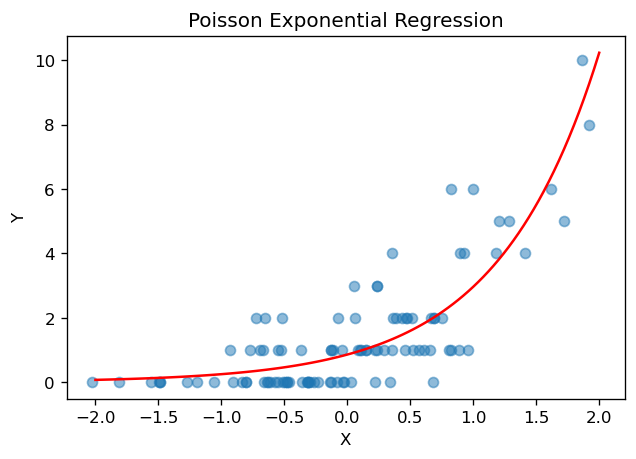

In [7]:
# Loading in the data.  
df = pd.read_csv("poisson_regression_data.csv") #file located in directory so don't need to list entire file path

# Fit the model.  You can use your functions.  
x = df.x.values 
X = np.c_[np.ones(df.shape[0]), x]
y= df.y.values

fig, ax= plt.subplots(dpi = 120)

# Scatter the data. 
ax.scatter(x,y, alpha = 0.5)

plt.title('Poisson Exponential Regression') #adding a title to the plot
plt.xlabel("X") #x axis label
plt.ylabel("Y") #y axis label

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X,y)

# Make predictions on new data
newx = np.linspace(-2,2,101) #Returns number spaces evenly w.r.t interval. Similar to arange but instead of step it uses sample number.
newX = np.c_[np.ones(df.shape[0]), newx]

# Make predictions on the new data
y_predicted= modelPrediction(betas,newX)

#Finally, plot the predictions on the same axis and color the predictions red
plt.plot(newx, y_predicted, color='red')


### Question 7:  /4 Mark(s)

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and plot the predictions over the same range.  Feel free to use `statsmodels` to fit the linear regression.

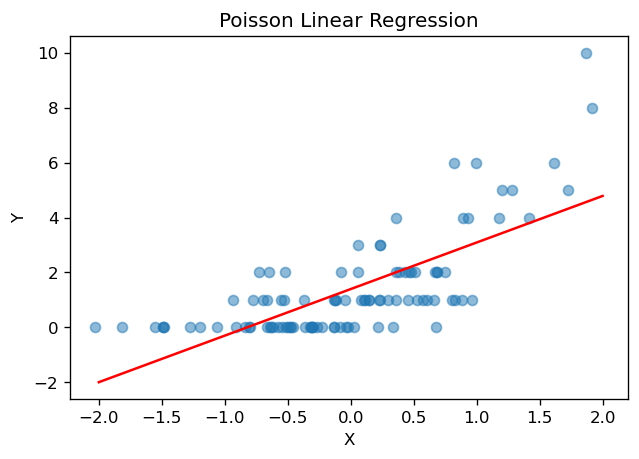

In [8]:
# Read in the data
df = pd.read_csv("poisson_regression_data.csv")
x = df.x.values 
X = np.c_[np.ones(df.shape[0]), x]
y= df.y.values

# Instantiate the model
model = sm.ols(formula="y~x", data= df) #calling the OLS function from the stats lib -recieves inputs and outputs and calculates
#could've done model =sm.ols(formula="y~x", data= df).fit()

# Fit the model.  Remember, in statsmodels this happens in a different step!
# You can use either the formula or the functionl API here 
result_OLS = model.fit() #fit the model
b_OLS = np.array([result_OLS.params.Intercept, result_OLS.params.x]) #extracting parameters and storing

# Make predictions over the range -2 to 2
newx = np.linspace(-2,2,101) #Returns number spaces evenly w.r.t interval. Similar to arange but instead of step it uses sample number.
newX = np.c_[np.ones(df.shape[0]), newx]
y_predicted= yp = np.dot(newX, b_OLS)

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)
ax.scatter(x,y, alpha = 0.5)

plt.title('Poisson Linear Regression') #adding a title to the plot
plt.xlabel("X") #x axis label
plt.ylabel("Y") #y axis label

#Finally, plot the predictions on the same axis and color the predictions red
plt.plot(newx, y_predicted, color='red')

### Question 8: /1 Mark(s)

a) Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things. Provide your answer below in markdown in fewer than 5 sentences.

---

a)The poisson distribution is a discrete probability distribution often used to describe count-based data. It's impossible to count negative things; for example, if you were to count cars passing by it can only increase, never decrease. Therefore, the major problem with the predications from the linear regression model above is the fact it suggests negative y values are possible. This means the linear regression model is incorrect for values from x = -2.0 to -0.75.




### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.